In [17]:
# Variance of the PCA features for locating the intrensic dimension of the dataset

# Dimension reduction:          Dimension reduction represents the same data using less features and is vital for 
#                               building machine learning pipelines using real-world data.
# Principal Component Analysis: PCA performs dimension reduction by discarding the PCA features with lower variance, 
#                               which it assumes to be noise, and retaining the higher variance PCA features, which it assumes to be informative.

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Loading the df
fish_df = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/fish.csv',header=None)

# Creating an array of the numeric data for model to work with
fish_array = fish_df.iloc[:,1:7].values

# Creating the species list for the model, by extracting the column from the df.
# Calling df,locating all observations on first column, collecting values, passing as a list.
species = fish_df.iloc[:,0].values.tolist()



### Example of what we are trying to locate
The image is a representation which shows features on the x-axis and the level of variance each one contains on the y-axis.
![Alt text](Dimension%20Reduction%20Visualized.png)

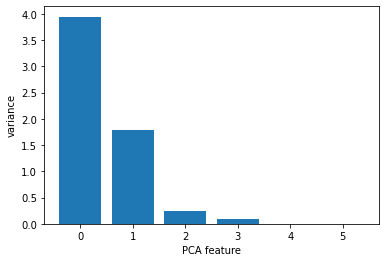

In [18]:
# Creating scaler
scaler = StandardScaler()

# Creating a PCA instance
pca = PCA()

# Creating the pipeline
pipeline = make_pipeline(scaler, pca)  # It looks as if we dont use this code for the barchart, but pca is inside the pipeline.

# Fit the pipeline to the data
pipeline.fit(fish_array)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# It looks like PCA features 0 and 1 have significant variance.
# Basically what we are looking at is this: the dataset has 6 features/variables, this model exist in the 6th dimension.
# because it resides physically in the 6th dimension, it is hard for us to determine what is really needed and what is not
# needed. We can compress our dataset and reduce noise by preforming PCA and locating what features are actually needed.
# So in this dataset we can see that both the first and second feature have significant variance.
# Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset is 2, meaning,
# since we have the intrinsic dimension of the dataset we can reduce or compress it as these features which matter the most, typically.

# TLDR: locate the variance of each feature/dimension/variable then once accomplished, 'flatten' the data, removing
#       the noisey features/dimensions/variables. This helps streamline real world models and real world applications
#       for their desired utility.

In [19]:
# Re-calabrating the instance we created of pca to select only features 0 and 1, or the first and second.
pca = PCA(n_components=2)

# Creating the re-calabrated pipeline
pipeline = make_pipeline(scaler, pca)           # pipeline stores these 2 processes

# Fit the pipeline to the data
pipeline.fit(fish_array)                        # Fitting the pipeline to the data. Fitting the PCA really

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(fish_array)   # Transforms the data based on the importance of the 2 features desired

# NOTE When you perform a dimensionality reduction technique like PCA and transform the data to a 
# lower-dimensional space, the remaining features are a combination of the original features that have the most 
# importance in capturing the patterns in the data. Data is not lost, only redistributed to the new size.

# Verification of the desired shape of pca_features, showing that we have successfully reduced the dimensionality from 6 to 2.
print(pca_features.shape)


(85, 2)
